## Let's sum up all the analysis in a single dataframe !

Total : 90 subjects
89 subjects remaining after removing problematic subjects.
A total of 1557/9790 actions were missed. (15.90 %)
(89, 3)


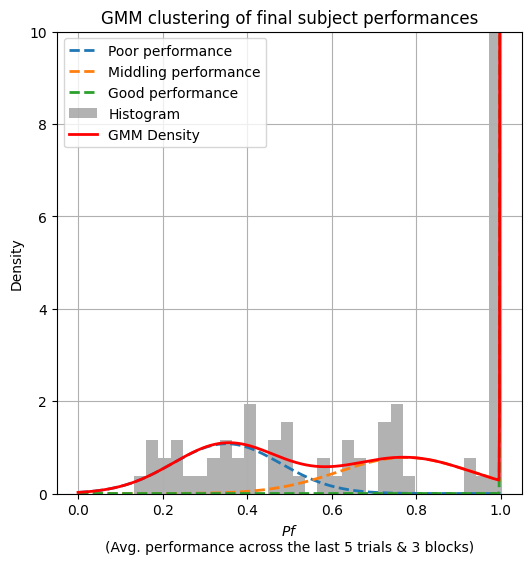

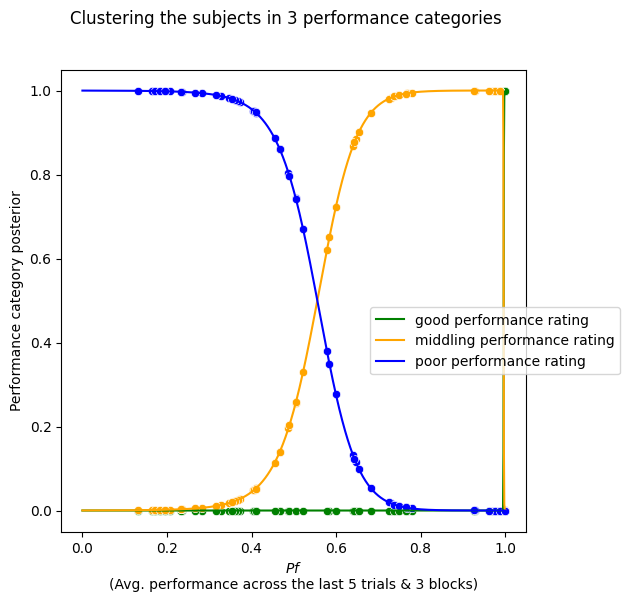

c:\Users\annic\OneDrive\Bureau\MainPhD\code\behavioural_exp_code\analysis_tools\dataframe_from_raw_data.py:351: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


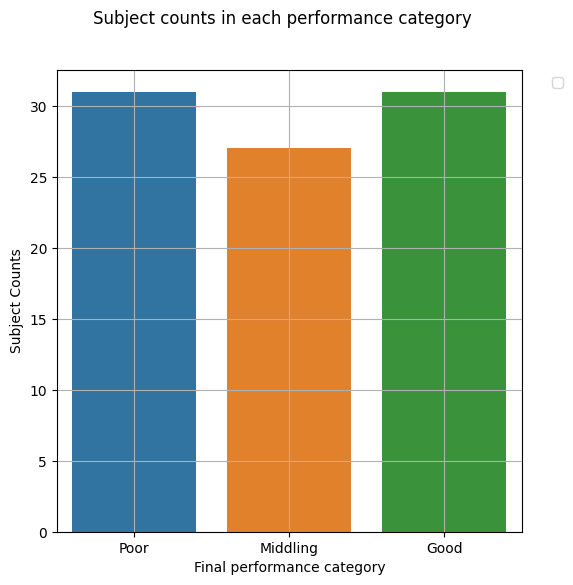

 - Loaded the task results for study 66f96c31e69227986334a027 
    (16 subjects.)
 - Loaded the task results for study 66d086503c0a69291c361b67 
    (40 subjects.)
Total : 56 subjects
55 subjects remaining after removing problematic subjects.
A total of 14/6050 actions were missed. (0.23 %)
 - Loaded the task results for study 6703ab18d345eaa4893587e0 
    (49 subjects.)
 - Loaded the task results for study 66f9aee8210357265a5958fc 
    (50 subjects.)
 - Loaded the task results for study 6703ab1a7ea30557549dc6da 
    (50 subjects.)
Total : 149 subjects
145 subjects remaining after removing problematic subjects.
A total of 33/15950 actions were missed. (0.21 %)
(200, 3)


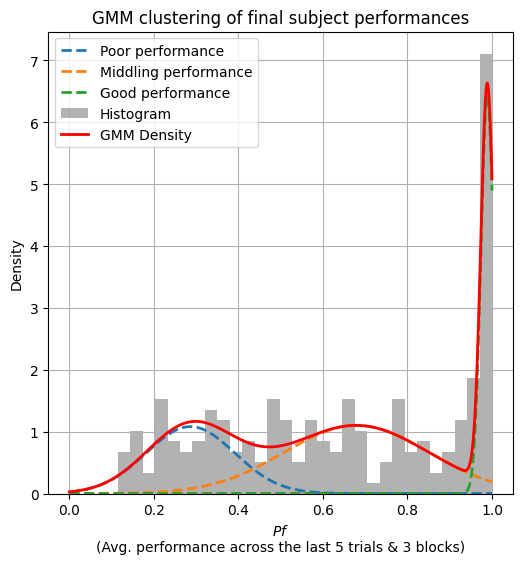

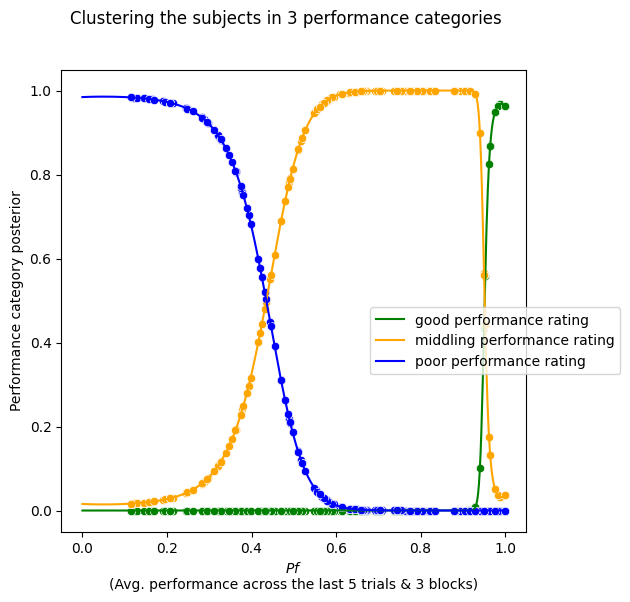

c:\Users\annic\OneDrive\Bureau\MainPhD\code\behavioural_exp_code\analysis_tools\dataframe_from_raw_data.py:351: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


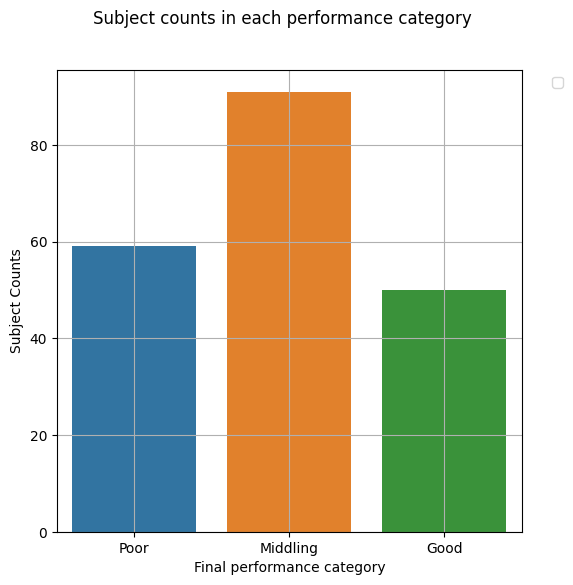

                   subject_id                     task_code lang  \
0    66019988a3d63339927cc80f  002+66a7b2fb39d6e392a2f5e1b7   en   
1    6601de6da8d95fd0870ab712  002+66a7b2fb39d6e392a2f5e1b7   en   
2    668fa9fffe6f2e5f9232a721  002+66a7b2fb39d6e392a2f5e1b7   en   
3    5f0559d1bc410b85707c58a3  002+66a7b2fb39d6e392a2f5e1b7   en   
4    5c8cb4edc708720001241e76  002+66a7b2fb39d6e392a2f5e1b7   en   
..                        ...                           ...  ...   
284  64e76ad4ce316de314ca559b  003+6703ab1a7ea30557549dc6da   en   
285  66b62528d79895cc008e8e3b  003+6703ab1a7ea30557549dc6da   en   
286  66b38624283af88b5fb39daa  003+6703ab1a7ea30557549dc6da   en   
287  6697c2177d987a6d52b2b964  003+6703ab1a7ea30557549dc6da   en   
288  665e8784960919e34257696d  003+6703ab1a7ea30557549dc6da   en   

                     browser  N_trials  N_tmstps                  start_date  \
0                    CHROME         11        10  2024-08-19 10:11:21.292000   
1                    CH

In [1]:

import sys,os
import pickle

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly as pltly
import plotly.express as px
import plotly.graph_objects as go

from sklearn.mixture import GaussianMixture

from jax import vmap
import jax.numpy as jnp

# + local functions : 
from database_handling.database_extract import get_all_subject_data_from_internal_task_id
from utils import remove_by_indices
from analysis_tools.preprocess import get_preprocessed_data_from_df
from analysis_tools.dataframe_from_raw_data import get_full_dataframe_from_raw_data

LAST_T_TIMESTEPS = 5
LAST_K_TRIALS = 3

LLM_CLASSIFS_PATH = os.path.join("results","llm_classifications","cluster_11_03.data")

STUDIES_EXTRACTION_CODES_1 = {
    "study_1" : {
        "dict_code" : "002",
        "internal_task_id" : "002",
        "studies_id" : None,
        "exclude_subjects" : ["5c9cb670b472d0001295f377"],
        "feedback_noise_bins" : [0,0.2,0.4,1]
    }
}
subjects_df_1 = get_full_dataframe_from_raw_data(STUDIES_EXTRACTION_CODES_1,LLM_CLASSIFS_PATH,LAST_T_TIMESTEPS,LAST_K_TRIALS,max_y=True)


STUDIES_EXTRACTION_CODES_23 = {
    "study_2" : {
        "dict_code" : "003_1",
        "internal_task_id" : "003",
        "studies_id" :  ["66f96c31e69227986334a027","66d086503c0a69291c361b67"],
        "exclude_subjects" : ["615c1741d4630b25e6bc1cb9"],
        "feedback_noise_bins" : [0,0.05,0.15,1]
    },
    "study_3" : {
        "dict_code" : "003_2",
        "internal_task_id" : "003",
        "studies_id" : ["6703ab18d345eaa4893587e0","66f9aee8210357265a5958fc","6703ab1a7ea30557549dc6da"],
        "exclude_subjects" : ["611d60c383f4f70ff4bc99fd", "66a74bdfdcaccdc0703894d5",
                              "667d92f2ea5c1542f417285d", "6548f570022275786186ffbd"],
        "feedback_noise_bins" : [0,0.05,0.15,1]
    }
}


subjects_df_23,llm_qsts = get_full_dataframe_from_raw_data(STUDIES_EXTRACTION_CODES_23,LLM_CLASSIFS_PATH,LAST_T_TIMESTEPS,LAST_K_TRIALS,return_qsts=True)

full_dataframe = pd.concat([subjects_df_1,subjects_df_23],axis=0,ignore_index=True)
print(full_dataframe)

{'prompt': 'According to you, what was the best strategy in order to control the gauge level ? In retrospect, what other strategy should you have attempted ? (Try to answer as precisely as possible.)', 'additionnal_instructions': 'Given the design of the task and the answer of the participant, would you say he / she managed to complete the task successfullY ?', 'categories': [{'letter': 'A', 'content': 'The subject did not provide any answer to the question / The answer was off-topic.'}, {'letter': 'B', 'content': 'The subject found the optimal strategy.'}, {'letter': 'C', 'content': "The subject found only part of the optimal strategy (e.g. placing points on top of each other, drawing an horizontal line, but not in a 'diagonal' or at a 45° angle)."}, {'letter': 'D', 'content': 'The subject used a completely wrong strategy.'}, {'letter': 'E', 'content': 'The subject reported not trying any strategy / acting randomly'}], 'dict_key': 'mandatory_q2', 'answers': 'single'}
    study_name pe

C:\Users\annic\AppData\Local\Temp\ipykernel_7292\797525424.py:43: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


{'prompt': 'According to you, what was the best strategy in order to control the gauge level ? In retrospect, what other strategy should you have attempted ? (Try to answer as precisely as possible.)', 'additionnal_instructions': 'Please report if the subject answer contained any of the following :', 'categories': [{'letter': 'A', 'content': 'No mention to action / strategy at all.'}, {'letter': 'B', 'content': 'The points / arrows may be placed in relationship with the current level of the gauge.'}, {'letter': 'C', 'content': 'The points / arrows may be placed at a specific time (example : as quickly as possible / when the gauge was up).'}, {'letter': 'D', 'content': 'The points / arrows may be placed at a specific be placed at a specific angle / one on top-right compared to the other.'}, {'letter': 'E', 'content': 'The points / arrows may be placed at a specific be placed at a specific distance from one another.'}, {'letter': 'F', 'content': 'The points / arrows may be placed at a sp

C:\Users\annic\AppData\Local\Temp\ipykernel_7292\797525424.py:43: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


{'prompt': 'According to you, what was the best strategy in order to control the gauge level ? In retrospect, what other strategy should you have attempted ? (Try to answer as precisely as possible.)', 'additionnal_instructions': 'Please report the level of confidence of the subject :', 'categories': [{'letter': 'A', 'content': 'The subject was very confident about its answer.'}, {'letter': 'B', 'content': 'The subject was moderately confident about it answer.'}, {'letter': 'C', 'content': 'The subject was not confident about it answer.'}, {'letter': 'D', 'content': 'The subject felt completely lost in its answer.'}], 'dict_key': 'mandatory_q2', 'answers': 'single'}
    study_name performance_category question_2 question_answer  \
0      study_1                 Good          A               A   
1      study_1                 Good          B               B   
2      study_1             Middling          B               B   
3      study_1             Middling          B               

C:\Users\annic\AppData\Local\Temp\ipykernel_7292\797525424.py:43: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


{'prompt': 'Did you notice any technical issues (buttons not working, graphical bugs, etc.) ? If yes, how did they appear ?', 'additionnal_instructions': '', 'categories': [{'letter': 'A', 'content': 'The subject did not provide any answer to the question / The answer was off-topic.'}, {'letter': 'B', 'content': 'The subject did not encounter any issue.'}, {'letter': 'C', 'content': 'The subject encountered only minor technical issues : display delays, lag, stuttering.'}, {'letter': 'D', 'content': 'The subject encountered serious issues but only affected a limited amount of data (e.g. only in a few actions).'}, {'letter': 'E', 'content': 'The subject encountered catastrophic issues that impacted the gathering of meaningful data.'}], 'dict_key': 'optional_q1', 'answers': 'single'}
    study_name performance_category question_3 question_answer  \
0      study_1                 Good          B               B   
1      study_1                 Good          B               B   
2      stu

C:\Users\annic\AppData\Local\Temp\ipykernel_7292\797525424.py:43: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


{'prompt': 'The instructions were meant to help you understand the task before it started. How clear did you find them ? What would you change to make them clearer ?', 'additionnal_instructions': '', 'categories': [{'letter': 'A', 'content': 'The subject did not provide any answer to the question / The answer was off-topic.'}, {'letter': 'B', 'content': 'The subject fully understood the instructions.'}, {'letter': 'C', 'content': 'The subject partially understood the instructions.'}, {'letter': 'D', 'content': 'The subject struggled to understand the instructions.'}, {'letter': 'E', 'content': 'The subject did not understand the instructions at all.'}], 'dict_key': 'optional_q2', 'answers': 'single'}
    study_name performance_category question_4 question_answer  \
0      study_1                 Good          B               B   
1      study_1                 Good          B               B   
2      study_1             Middling          B               B   
3      study_1            

C:\Users\annic\AppData\Local\Temp\ipykernel_7292\797525424.py:43: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


{'prompt': 'Do you think there was a logic behind how the gauge responded ? How hard / frustrating did you find the task ? Other remarks ?', 'additionnal_instructions': '', 'categories': [{'letter': 'A', 'content': 'The subject did not provide any answer to the question / The answer was off-topic.'}, {'letter': 'B', 'content': 'The subject believed there was a logic behind how the gauge behaved and found it.'}, {'letter': 'C', 'content': 'The subject believed there was a logic behind how the gauge behaved but did not manage to find it.'}, {'letter': 'D', 'content': 'The subject believed there was a slight logic behind how the gauge behaved but with significant erratic behaviour.'}, {'letter': 'E', 'content': 'The subject did not find any logic in the gauge behaviour.'}], 'dict_key': 'optional_q3', 'answers': 'single'}
    study_name performance_category question_5 question_answer  \
0      study_1                 Good          B               B   
1      study_1                 Good   

C:\Users\annic\AppData\Local\Temp\ipykernel_7292\797525424.py:43: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


{'prompt': 'Do you think there was a logic behind how the gauge responded ? How hard / frustrating did you find the task ? Other remarks ?', 'additionnal_instructions': '', 'categories': [{'letter': 'A', 'content': 'The subject did not provide any answer to the question.'}, {'letter': 'B', 'content': 'The task was very easy to the subject.'}, {'letter': 'C', 'content': 'The task was moderately easy to the subject.'}, {'letter': 'D', 'content': 'The task was initially hard but then became easy when the subject found out the correct strategy.'}, {'letter': 'E', 'content': 'The task was very hard to the subject.'}], 'dict_key': 'optional_q3', 'answers': 'single'}
    study_name performance_category question_6 question_answer  \
0      study_1                 Good          D               D   
1      study_1                 Good          D               D   
2      study_1             Middling          B               B   
3      study_1             Middling          E               E   
4

C:\Users\annic\AppData\Local\Temp\ipykernel_7292\797525424.py:43: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


{'prompt': 'Do you think there was a logic behind how the gauge responded ? How hard / frustrating did you find the task ? Other remarks ?', 'additionnal_instructions': '', 'categories': [{'letter': 'A', 'content': 'The subject did not provide any answer to the question.'}, {'letter': 'B', 'content': 'The subject found the task funny / entertaining / interesting.'}, {'letter': 'C', 'content': 'The subject reported no strong opinion on the task.'}, {'letter': 'D', 'content': 'The subject found the task boring.'}, {'letter': 'E', 'content': 'The subject found the task a bit frustrating.'}, {'letter': 'F', 'content': 'The subject found the task very frustrating.'}], 'dict_key': 'optional_q3', 'answers': 'single'}
    study_name performance_category question_7 question_answer  \
0      study_1                 Good          C               C   
1      study_1                 Good          E               E   
2      study_1             Middling          C               C   
3      study_1  

C:\Users\annic\AppData\Local\Temp\ipykernel_7292\797525424.py:43: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


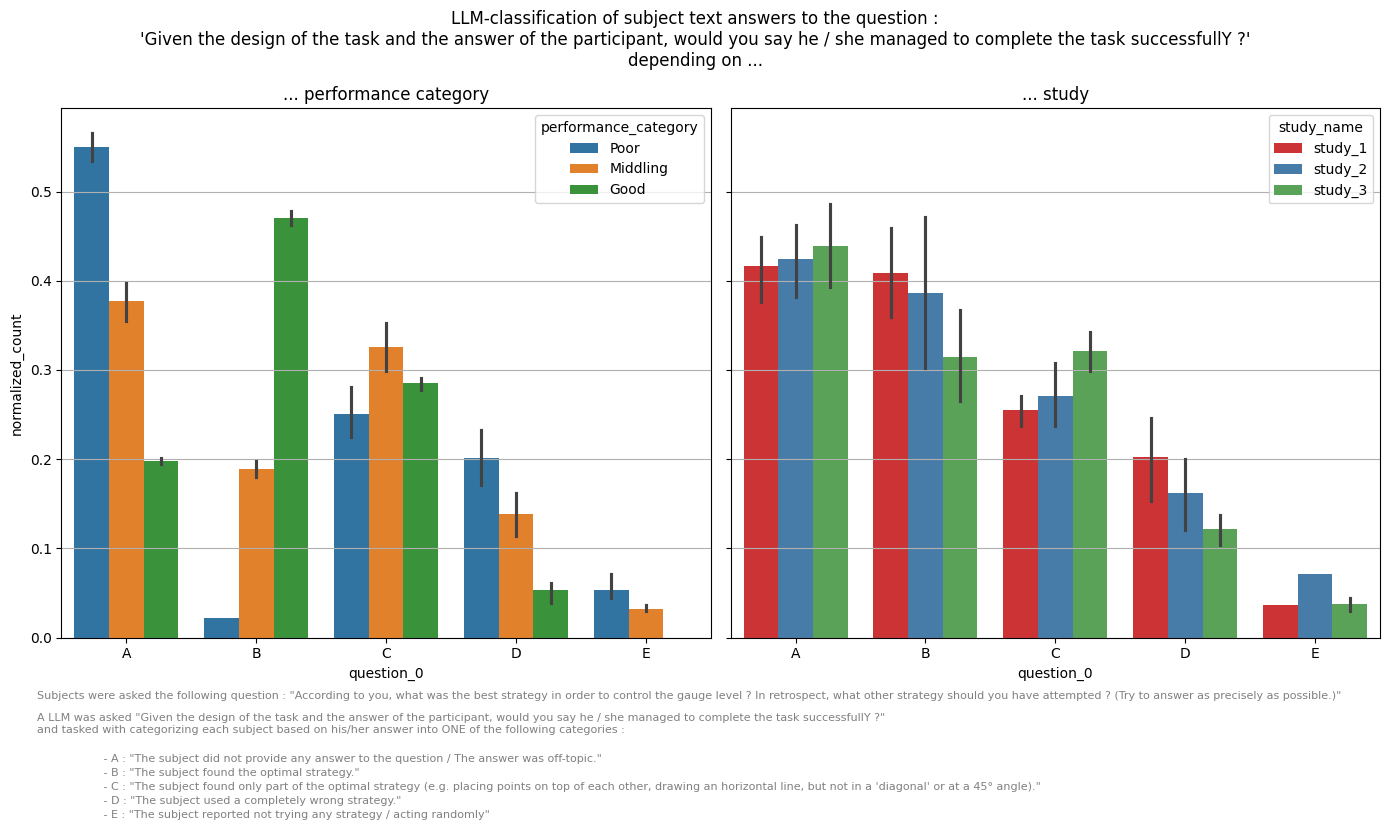

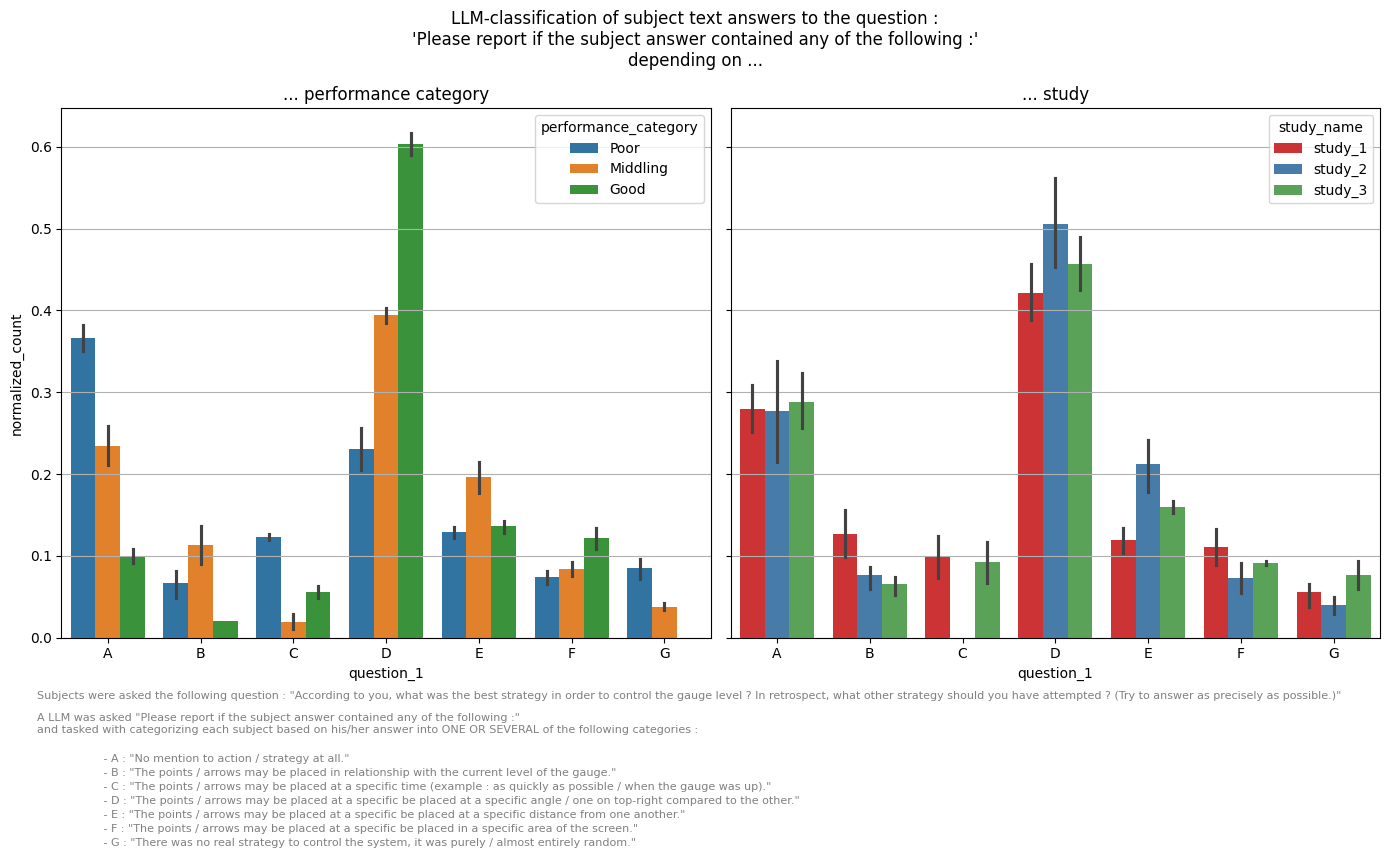

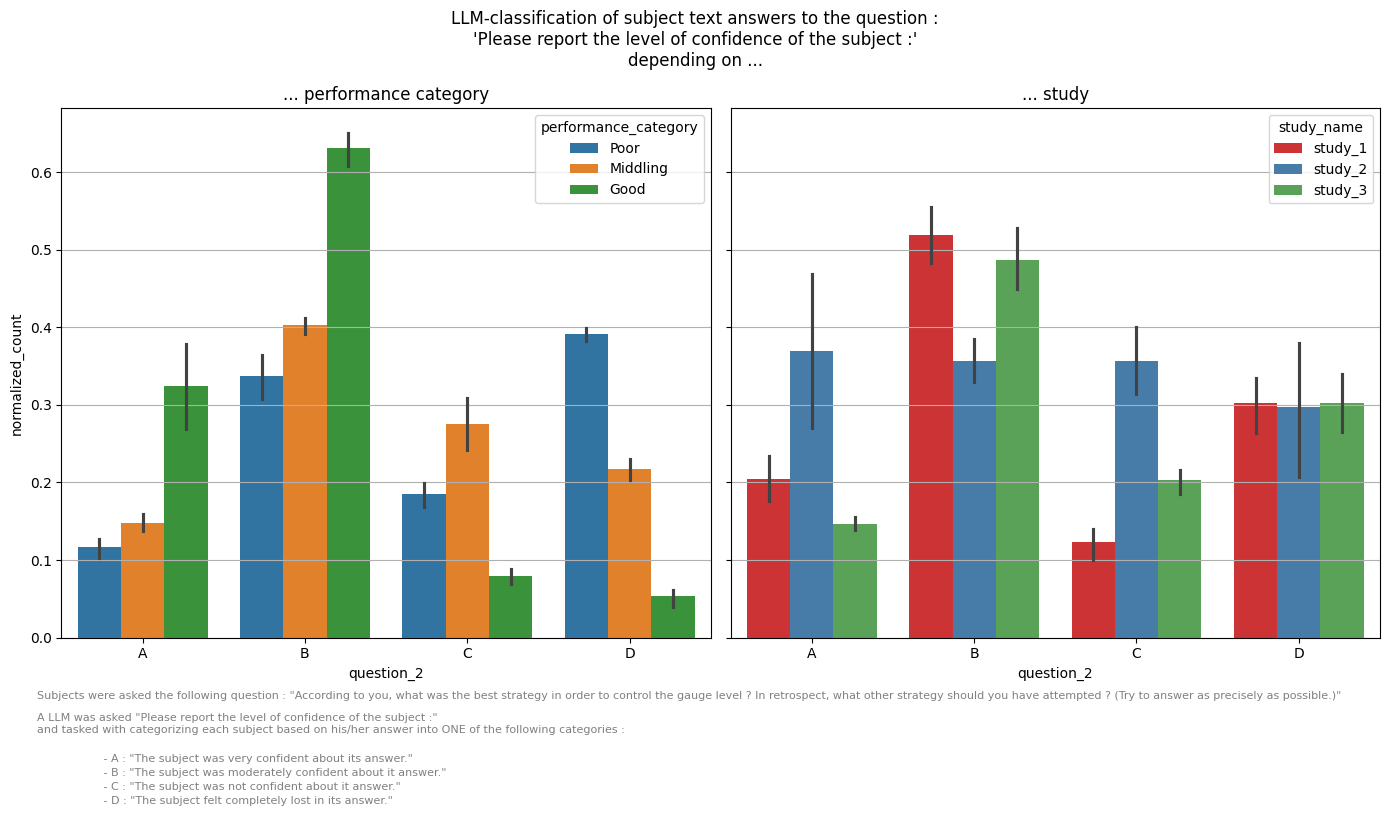

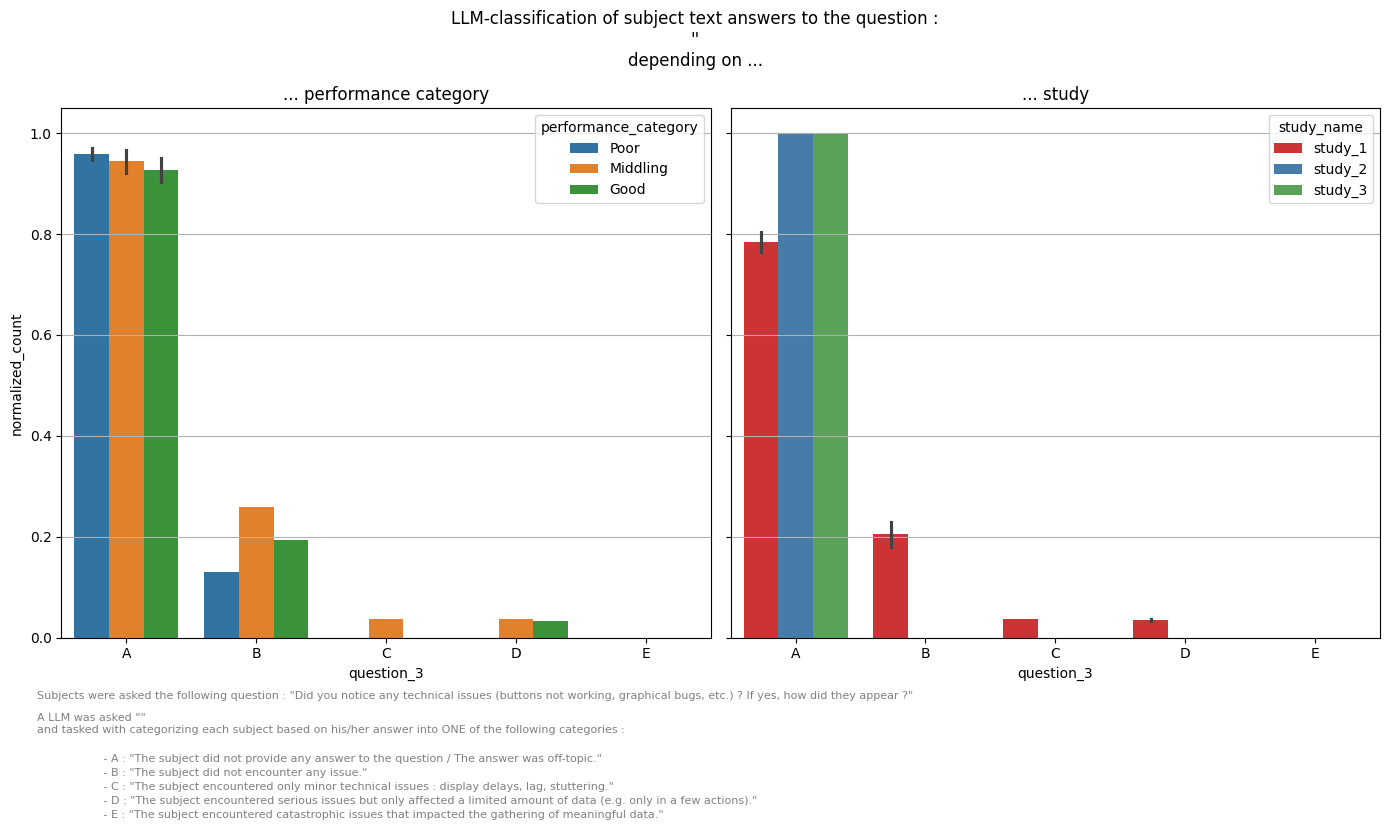

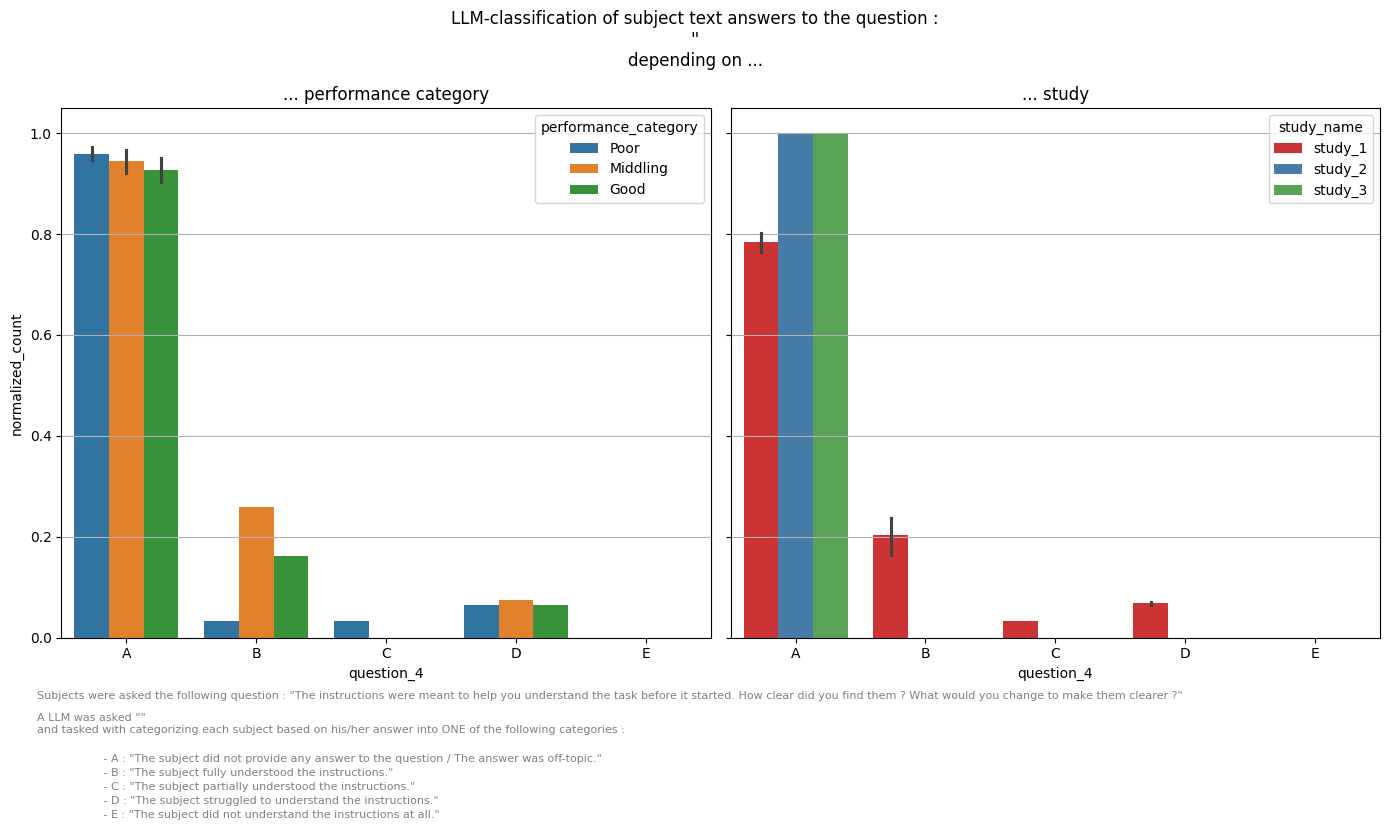

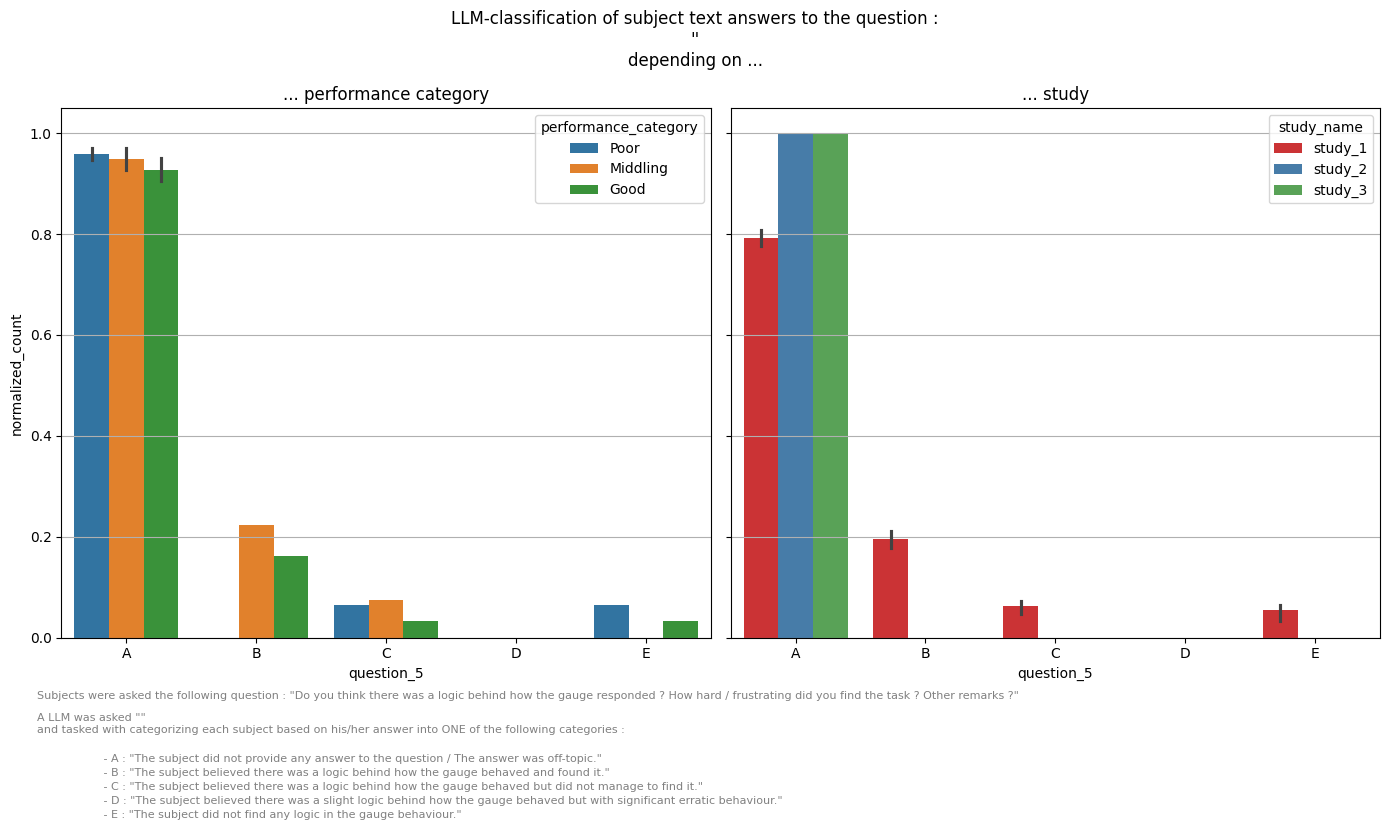

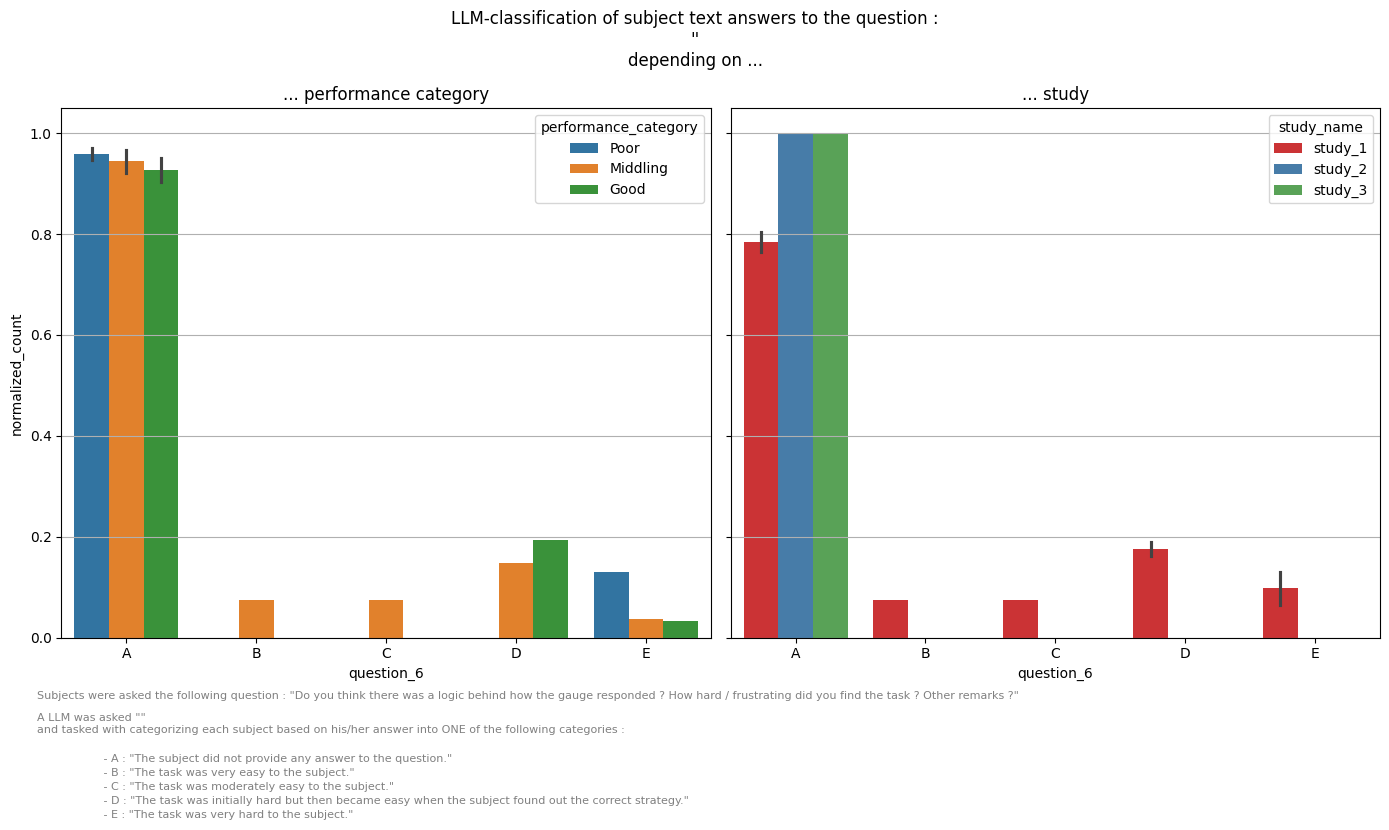

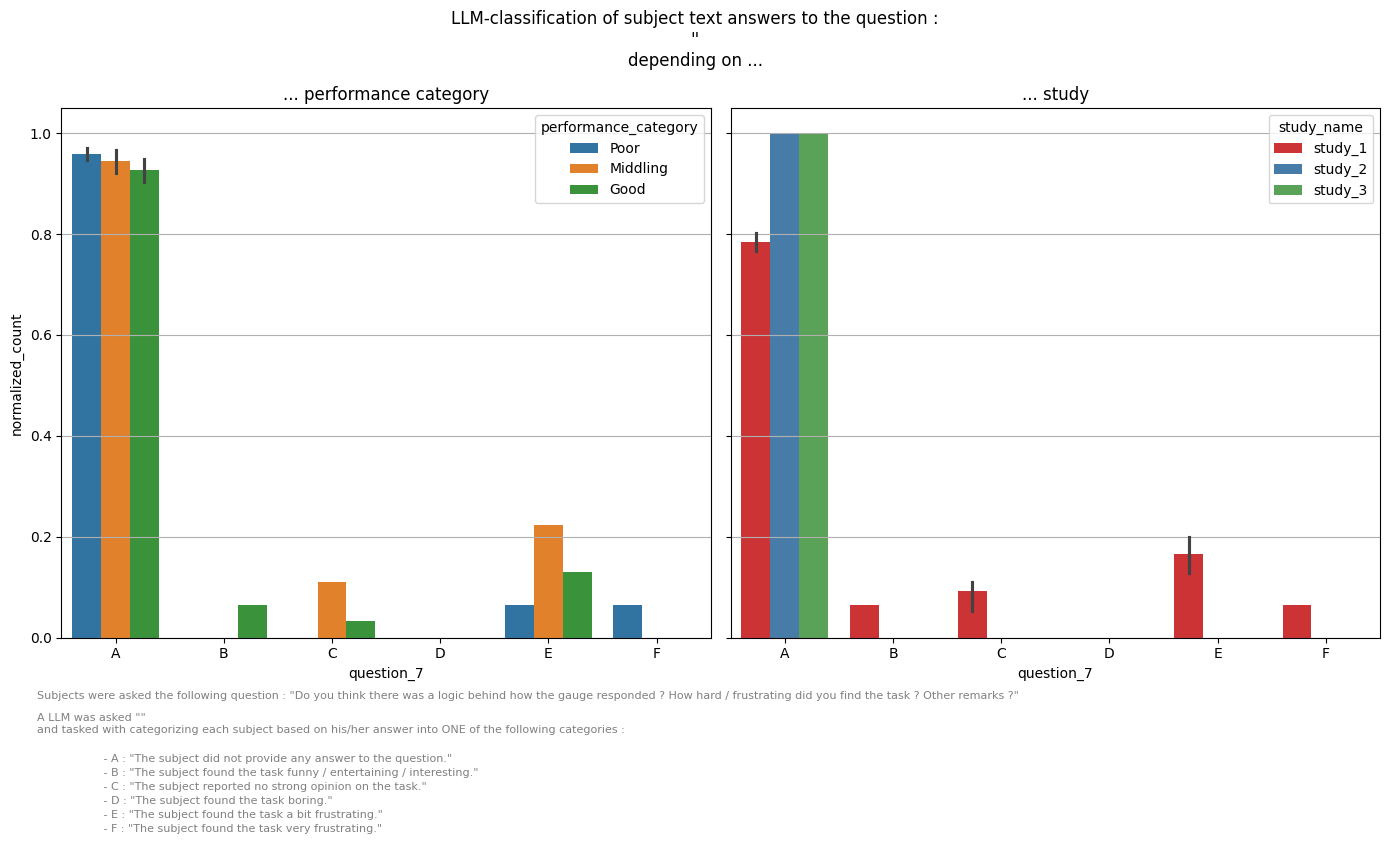

In [2]:
hue_order = ["Poor","Middling","Good"]
study_hue_order = ["study_1","study_2","study_3"]
    
for i in range(8):
    qcode = "question_{}".format(i)
    llm_prompt = llm_qsts[qcode]
    categories = llm_qsts[qcode]['categories']
    class_order = [cat["letter"] for cat in categories]
    
    cleaned_df = full_dataframe[['study_name','performance_category',qcode]].copy()
    
    cleaned_df[qcode] = cleaned_df[qcode].str.split(',')
    cleaned_df = cleaned_df.explode(qcode, ignore_index=True)
    cleaned_df[qcode] = cleaned_df[qcode].str.strip()
    cleaned_df['question_answer'] = pd.Categorical(cleaned_df[qcode],categories=class_order,ordered=True)
            
            
    
    cleaned_df['normalized_count'] = cleaned_df.groupby(['study_name','performance_category'])[qcode].transform(lambda x: x.map(x.value_counts(normalize=True)))

    

    print(llm_prompt)
    print(cleaned_df)
    print(cleaned_df[cleaned_df.index.duplicated()])
        
    fig,axs = plt.subplots(1,2,figsize=(14,7),sharey=True)
    fig.suptitle("LLM-classification of subject text answers to the question :\n'{}'\ndepending on ...".format(llm_prompt["additionnal_instructions"]))
    fig.text(0.03, 0, 'Subjects were asked the following question : "{}"'.format(llm_prompt['prompt']), fontsize=8, color='grey', ha='left', va='center')


    one_or_several = "ONE of" if llm_prompt["answers"]=="single" else "ONE OR SEVERAL of"
    fig.text(0.03, -0.04, 'A LLM was asked "{}"\nand tasked with categorizing each subject based on his/her answer into {} the following categories :'.format(llm_prompt["additionnal_instructions"],one_or_several), fontsize=8, color='grey', ha='left', va='center')
    for i,response in enumerate(llm_prompt["categories"]):
        fig.text(0.07, -0.07-(i+1)*0.02, '   - {} : "{}"'.format(response['letter'],response['content']), fontsize=8, color='grey', ha='left', va='center')
    for ax in axs:
        ax.grid()
    axs[0].set_title("... performance category")
    sns.barplot(ax = axs[0],data=cleaned_df, x=qcode, y='normalized_count', hue='performance_category',order=class_order,hue_order=hue_order)
    axs[1].set_title("... study")
    sns.barplot(ax = axs[1], data=cleaned_df, x=qcode, y='normalized_count',hue='study_name',order=class_order,hue_order=study_hue_order,palette='Set1')
    fig.tight_layout()
    fig.show()

# # Alternative plot :
# g = sns.catplot(
#     data=cleaned_df, x=qcode,y='normalized_count', hue='performance_category',
#     kind='bar', col='study_name',order=class_order,hue_order=hue_order,
#     errorbar='se'
# )
# g.set_axis_labels("Answer", "Ratio")
# g.set_titles("Response: {col_name}")
# plt.show()

slope        5.918920e-01
intercept    3.624933e-01
r_squared    3.015899e-01
p_value      3.625440e-24
dtype: float64


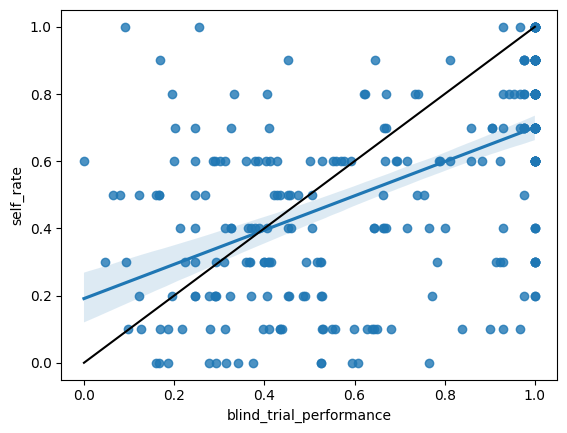

---
slope        7.288132e-01
intercept   -1.642684e-04
r_squared    4.934610e-01
p_value      1.698595e-14
dtype: float64
slope        0.284719
intercept    0.384265
r_squared    0.145472
p_value      0.004065
dtype: float64
slope        4.776161e-01
intercept    2.149424e-01
r_squared    2.636144e-01
p_value      4.009165e-11
dtype: float64


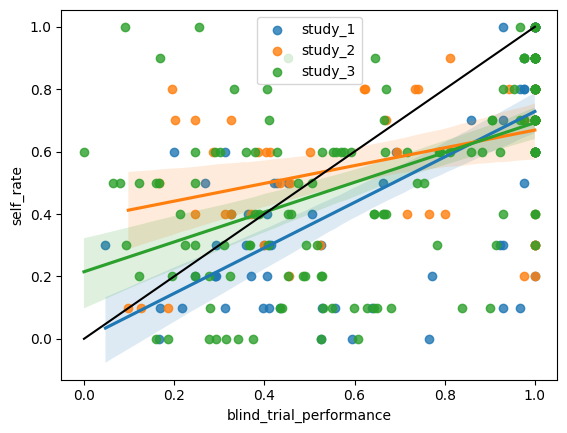

C:\Users\annic\AppData\Local\Temp\ipykernel_7292\2808025133.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  studied_df["self_rate"] = studied_df["mandatory_q1"]/10


slope        0.479876
intercept    0.315367
r_squared    0.315321
p_value      0.000027
dtype: float64
slope        0.463965
intercept    0.186786
r_squared    0.242326
p_value      0.000440
dtype: float64
slope        0.313434
intercept    0.241246
r_squared    0.129023
p_value      0.011254
dtype: float64


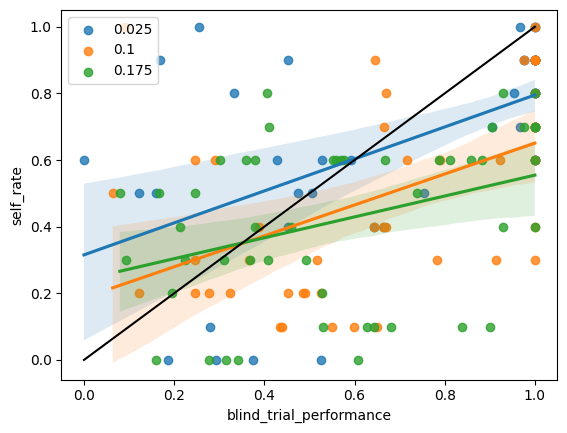

In [3]:
# Another way of qualifying learners vs non learners : slope !
from scipy.stats import linregress
import statsmodels.api as sm 
import statsmodels.formula.api as smf
from statsmodels.graphics.api import abline_plot
from scipy import stats

studied_df = full_dataframe.copy()


def calculate_regression(x, y,label = None):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    if label is None :
        _label = ''
    else : 
        _label = '_{}'.format(label)
    return pd.Series({
        'slope{}'.format(_label): slope,
        'intercept{}'.format(_label): intercept,
        'r_squared{}'.format(_label): r_value ** 2,
        'p_value{}'.format(_label): p_value
    })


studied_df["self_rate"] = studied_df["mandatory_q1"]/10
reg = calculate_regression(studied_df["self_rate"],studied_df["blind_trial_performance"])
print(reg)
fig,ax = plt.subplots(1,1)
sns.regplot(ax= ax,data = studied_df,x="blind_trial_performance",y="self_rate")
ax.plot(np.linspace(0,1,100),np.linspace(0,1,100),color='black')
plt.show()

print("---")

fig,ax = plt.subplots(1,1)
for study in ["study_1","study_2","study_3"]:
    my_data= studied_df[studied_df["study_name"] == study]
    
    sns.regplot(ax= ax,data = my_data,x="blind_trial_performance",y="self_rate",label=study)
    
    print(calculate_regression(my_data["blind_trial_performance"],my_data["self_rate"]))
ax.plot(np.linspace(0,1,100),np.linspace(0,1,100),color='black')
ax.legend()
plt.show()



studied_df = full_dataframe[full_dataframe["study_name"]=="study_3"]
studied_df["self_rate"] = studied_df["mandatory_q1"]/10
fig,ax = plt.subplots(1,1)
for fbnoise_lvl in [0.025,0.1,0.175]:
    my_data= studied_df[studied_df["feedback_noise_std"] == fbnoise_lvl]
    
    sns.regplot(ax= ax,data = my_data,x="blind_trial_performance",y="self_rate",label=fbnoise_lvl)
    
    print(calculate_regression(my_data["blind_trial_performance"],my_data["self_rate"]))
ax.plot(np.linspace(0,1,100),np.linspace(0,1,100),color='black')
ax.legend()
plt.show()

C:\Users\annic\AppData\Local\Temp\ipykernel_7292\1131783927.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  studied_df["self_rate"] = studied_df["mandatory_q1"]/10
C:\Users\annic\AppData\Local\Temp\ipykernel_7292\1131783927.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  studied_df['fp_clip'] = studied_df[predicted_quantity].clip(eps, 1 - eps)
C:\Users\annic\AppData\Local\Temp\ipykernel_7292\1131783927.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

                 Generalized Linear Model Regression Results                  
Dep. Variable:               logit_fp   No. Observations:                  145
Model:                            GLM   Df Residuals:                      141
Model Family:                Gaussian   Df Model:                            3
Link Function:               Identity   Scale:                          5.2156
Method:                          IRLS   Log-Likelihood:                -323.46
Date:                Fri, 21 Mar 2025   Deviance:                       735.40
Time:                        13:59:53   Pearson chi2:                     735.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.2293
Covariance Type:            nonrobust                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

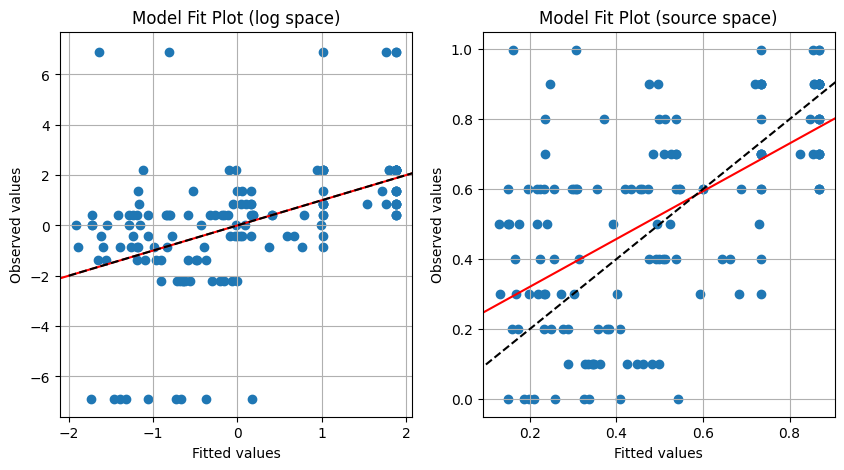

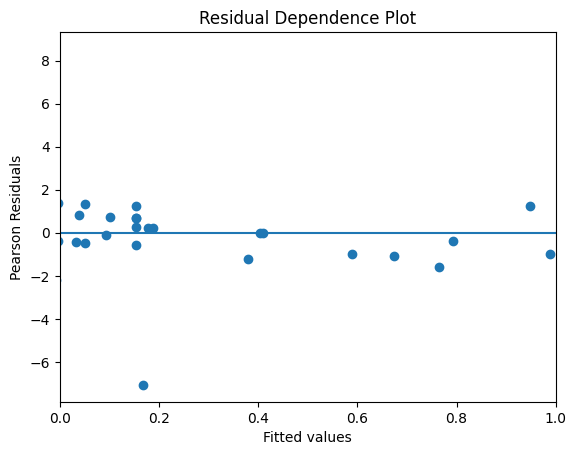

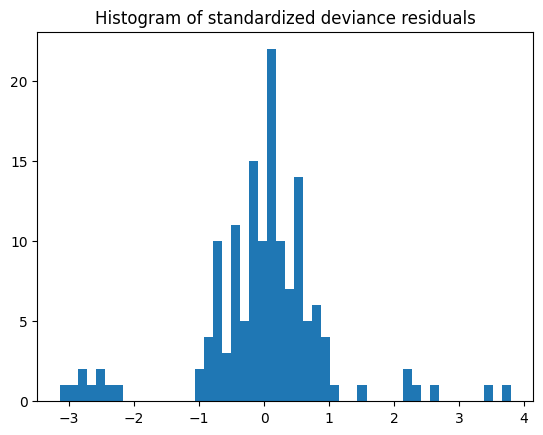

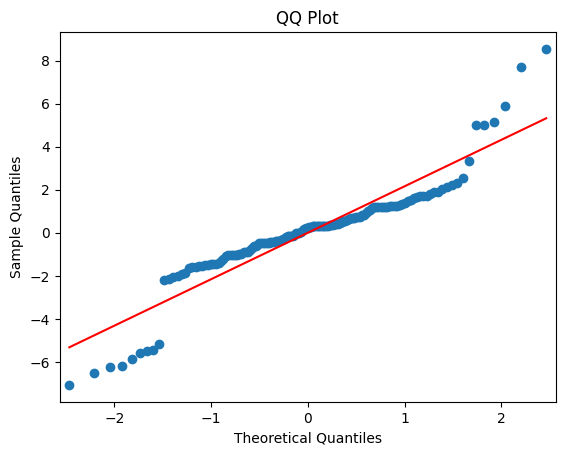

C:\Users\annic\AppData\Local\Temp\ipykernel_7292\1131783927.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  studied_df['pred_logit'] = result.predict(studied_df)
C:\Users\annic\AppData\Local\Temp\ipykernel_7292\1131783927.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  studied_df['pred_y'] = 1 / (1 + np.exp(-studied_df['pred_logit']))


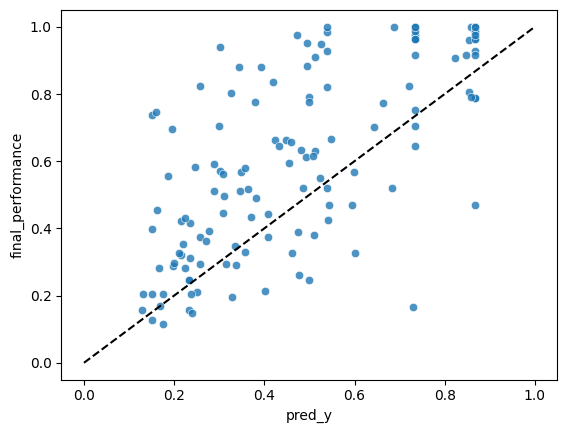

In [4]:
from scipy import stats
from statsmodels import graphics

def sigmoid(z):
    return 1/(1 + np.exp(-z))

studied_df = full_dataframe[(full_dataframe["study_name"] == "study_3" )]
studied_df["self_rate"] = studied_df["mandatory_q1"]/10


predicted_quantity = 'self_rate'

eps = 1e-3
studied_df['fp_clip'] = studied_df[predicted_quantity].clip(eps, 1 - eps)
studied_df['logit_fp'] = np.log(studied_df['fp_clip'] / (1 - studied_df['fp_clip']))


model = smf.glm(formula='logit_fp ~ blind_trial_performance*feedback_noise_std', data=studied_df, family=sm.families.Gaussian())
result = model.fit()

# Print summary of the model
print(result.summary())
print('Parameters  :\n', result.params)
print('T-values:\n', result.tvalues)

logy = studied_df['logit_fp']
logyhat = result.mu
y = studied_df['fp_clip']
yhat = sigmoid(logyhat)

fig, axs = plt.subplots(1,2,figsize=(10,5))
for ax in axs :
    # ax.set_ylim([0,1])
    # ax.set_xlim([0,1])
    ax.grid()

ax = axs[0]
ax.scatter(logyhat, logy)
line_fit = sm.OLS(logy, sm.add_constant(logyhat, prepend=True)).fit()
abline_plot(model_results=line_fit, ax=ax,color="red")
ax.set_title('Model Fit Plot (log space)')
ax.set_ylabel('Observed values')
ax.set_xlabel('Fitted values');
ax.plot(np.linspace(-2,7,100),(np.linspace(-2,7,100)),color='black',linestyle='--')

ax = axs[1]
ax.scatter(yhat, y)
line_fit = sm.OLS(y, sm.add_constant(yhat, prepend=True)).fit()
abline_plot(model_results=line_fit, ax=ax,color="red")
ax.set_title('Model Fit Plot (source space)')
ax.set_ylabel('Observed values')
ax.set_xlabel('Fitted values');
ax.plot(np.linspace(0,1,100),(np.linspace(0,1,100)),color='black',linestyle='--')

plt.show()



fig, ax = plt.subplots()
ax.scatter(logyhat, result.resid_pearson)
ax.hlines(0, 0, 1)
ax.set_xlim(0, 1)
ax.set_title('Residual Dependence Plot')
ax.set_ylabel('Pearson Residuals')
ax.set_xlabel('Fitted values')
plt.show()



fig, ax = plt.subplots()
resid = result.resid_deviance.copy()
resid_std = stats.zscore(resid)
ax.hist(resid_std, bins=50)
ax.set_title('Histogram of standardized deviance residuals');
plt.show()



graphics.gofplots.qqplot(resid, line='r')
plt.title("QQ Plot")
plt.show()





studied_df['pred_logit'] = result.predict(studied_df)
studied_df['pred_y'] = 1 / (1 + np.exp(-studied_df['pred_logit']))

sns.scatterplot(data = studied_df,x="pred_y",y="final_performance",alpha=0.8)
plt.plot(np.linspace(0,1,100),(np.linspace(0,1,100)),color='black',linestyle='--')
